In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [6]:
df = pd.read_csv("../../datasets/Invoices_Std.csv", encoding='latin-1', low_memory=False)

In [ ]:
CATEGORY_RULES = {
    "Trang trí nhà cửa": [
        r"t-light", r"lantern", r"candle", r"holder", r"heart", r"ornament",
        r"frame", r"cabinet", r"drawer", r"doormat", r"hanging", r"coat hanger",
        r"wood", r"sign", r"wall", r"storage tin", r"mirror", r"wreath",
        r"box", r"rack", r"pot", r"vase", r"bird", r"star", r"skull", r"hook",
        r"cushion", r"throw", r"felt", r"metal", r"ceramic", r"porcelain",
        r"shabby", r"chic", r"picture", r"shelves", r"display", r"garden",
        r"planter", r"statue", r"bamboo", r"tissue box", r"slipper", r"rug"
    ],
    "Nhà bếp": [
        r"mug", r"plate", r"cutlery", r"teaspoon", r"cake", r"tea towel",
        r"jam", r"recipe", r"snack box", r"lunch box", r"glass", r"cup",
        r"baking", r"coaster", r"bottle opener", r"apron", r"chopping board",
        r"jug", r"tray", r"kitchen", r"dish", r"salt and pepper", r"fork",
        r"knife", r"spoon", r"oil", r"vinegar", r"utensil", r"strainer",
        r"kettle", r"coffee"
    ],
    "Đồ chơi trẻ em": [
        r"playhouse", r"princess", r"doll", r"jigsaw", r"alphabet block",
        r"spaceboy", r"charlie", r"dinosaur", r"toy", r"game", r"puzzle",
        r"robot", r"tractor", r"plane", r"stickers", r"baby", r"kids",
        r"child", r"teddy", r"animal", r"miniature", r"colouring", r"clown",
        r"mermaid", r"wooden box"
    ],
    "Túi xách": [
        r"jumbo bag", r"shopper", r"storage bag", r"bag", r"basket", r"tote",
        r"pouch", r"sack", r"purse", r"wallet", r"suitcase", r"travel",
        r"holdall", r"kit bag", r"vanity case", r"luggage"
    ],
    "Quà tặng theo mùa": [
        r"christmas", r"gift", r"fairy", r"vintage", r"retro", r"bunny",
        r"easter", r"party", r"bunting", r"ribbon", r"birthday", r"celebration",
        r"new year", r"halloween", r"valentine", r"snowman", r"reindeer",
        r"santa", r"crackers"
    ],
    "Chăm sóc cơ thể": [
        r"hot water bottle", r"hand warmer", r"mug cosy", r"soap", r"bath",
        r"cosmetic", r"lotion", r"perfume", r"shampoo", r"cream", r"wash bag",
        r"sponge", r"towel", r"brush", r"manicure", r"face mask"
    ],
    "Văn phòng phẩm": [
        r"paper", r"card", r"paint set", r"sticker", r"clip", r"pen", r"pencil",
        r"notebook", r"diary", r"book", r"memo", r"postcard", r"journal",
        r"folder", r"file", r"stapler", r"eraser", r"rubber", r"ruler"
    ],
    "Thiết bị chiếu sáng": [
        r"night light", r"led", r"lamp", r"string lights", r"bulb", r"fairy lights"
    ],
    "Đồng hồ": [
        r"alarm clock", r"clock", r"watch", r"time"
    ],
    "Phụ kiện may mặc": [
        r"scarf", r"socks", r"cap", r"glove", r"jewel", r"ring", r"necklace",
        r"bracelet", r"hat", r"belt", r"tights", r"tie", r"brooch", r"pin",
        r"shoes", r"boot", r"sandal"
    ],
    "Vật liệu và Công cụ": [
        r"wire", r"tool", r"tape", r"roll", r"metal", r"glitter", r"glue",
        r"sewing", r"paint", r"kit"
    ],
    "Nội thất & Thiết bị lớn": [
        r"chair", r"table", r"bench", r"mattress", r"storage unit", r"trolley"
    ]
}

def infer_category(description):
    if not isinstance(description, str):
        return "Không xác định"
    
    text = description.lower()

    for category, patterns in CATEGORY_RULES.items():
        for p in patterns:
            if re.search(p, text):
                return category
    return "Không xác định"

df["Category"] = df["Description"].apply(infer_category)

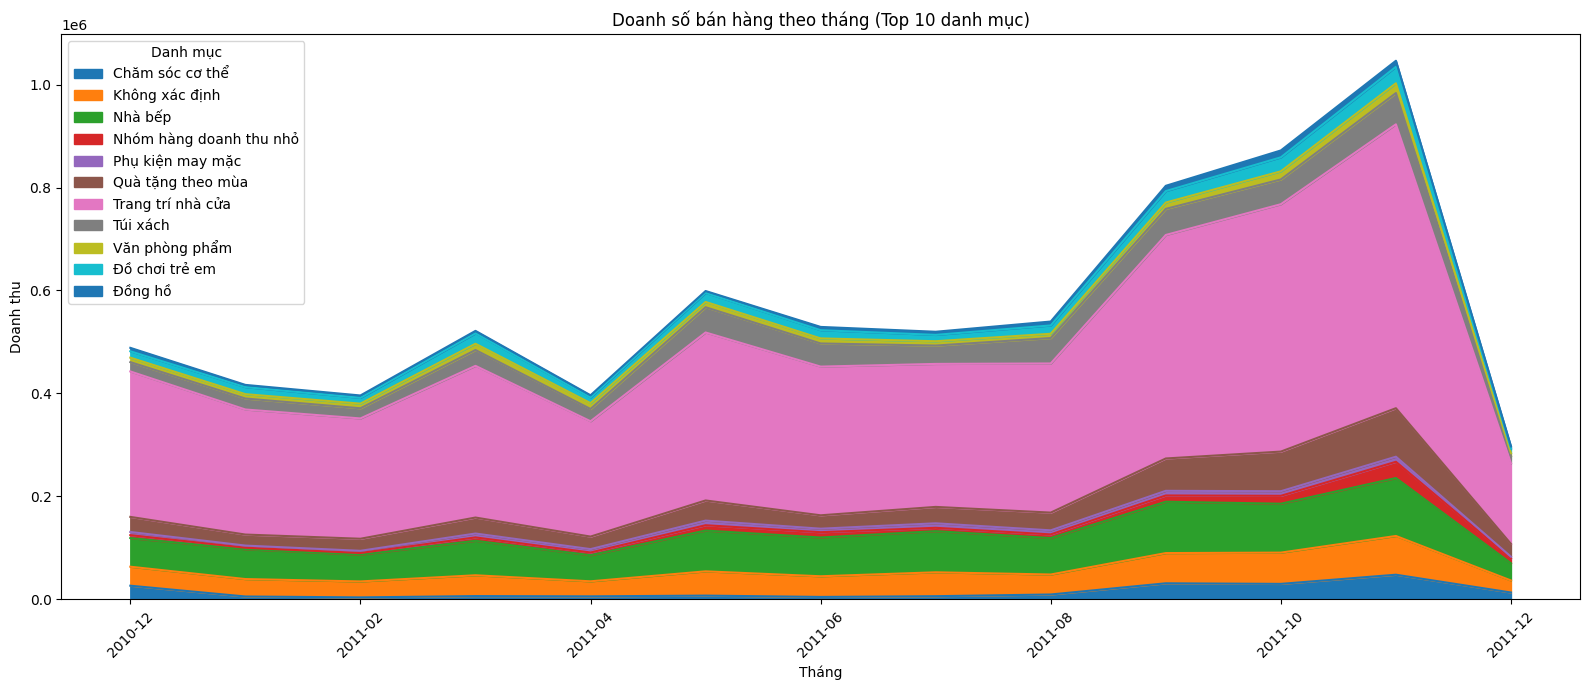

In [ ]:
df2 = df[df["Quantity"] > 0].copy()

df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"])
df2["YearMonth"] = df2["InvoiceDate"].dt.to_period("M").astype(str)
df2["Revenue"] = df2["Quantity"] * df2["UnitPrice"]

monthly = df2.groupby(["YearMonth", "Category"])["Revenue"].sum().reset_index()
top5 = (
    monthly.groupby("Category")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

monthly["Category2"] = monthly["Category"].apply(lambda c: c if c in top5 else "Nhóm hàng doanh thu nhỏ")
monthly2 = (
    monthly.groupby(["YearMonth", "Category2"])["Revenue"]
    .sum()
    .reset_index()
)

pivot_df = monthly2.pivot(index="YearMonth", columns="Category2", values="Revenue").fillna(0)

fig, ax = plt.subplots(figsize=(16, 7))
pivot_df.plot.area(ax=ax)

ax.set_title("Doanh số bán hàng theo tháng (Top 10 danh mục)")
ax.set_xlabel("Tháng")
ax.set_ylabel("Doanh thu")
ax.legend(title="Danh mục")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Doanh thu đạt đỉnh ở tháng 10 đến tháng 11 năm 2011, sau đó có sự sụt giảm mạnh.

Danh mục chiếm ưu thế là "Trang trí nhà cửa", đóng góp doanh thu trong suốt cả năm.

"Quà tặng theo mùa", "Nhà bếp" tăng trưởng cao trong mùa mua sắm cao điểm.